In [1]:
import pandas as pd
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
import glob

In [116]:
def rank_amplicon(s):
    """order the amplicon names to remove multi-mapped reads
    """
    if "wt_cut" in s:
        return 0
    if "wt1_cut" in s:
        return 0
    if "wt2_cut" in s:
        return 0
    if "1a_1a_cut" in s:
        return 1
    if "1b_1b_cut" in s:
        return 1
    if "large_deletion_cut" in s:
        return 1
    if "large_inversion_cut" in s:
        return 1
    if "1a_2a_cut" in s:
        return 1
    if "1a_2b_cut" in s:
        return 1
    if "2a_1b_cut" in s:
        return 1    
    if "2b_1b_cut" in s:
        return 1    
    return 2
def get_category(r):
    if "wt" in r.prefix:
        if r.overlap>0:
            return "indel(WT_amplicon)"
        return "WT_amplicon"
    return r.prefix
def get_intersection(region1_begin, region1_end, region2_begin, region2_end):
    list1 = range(int(region1_begin) + 1, int(region1_end) + 1)
    list2 = range(int(region2_begin) + 1, int(region2_end) + 1)
    return len(set(list1).intersection(list2))
def read_file(label):
    files = glob.glob("{0}/*/*{0}*amplicon_mapping.tsv".format(label))
    df = pd.concat([pd.read_csv(f,sep="\t") for f in files])
    df['amplicon_order'] = df.prefix.apply(rank_amplicon)
    df = df.sort_values(['AS',"amplicon_order"],ascending=[False,True])
    df = df.drop_duplicates("read_name")
    df = df.drop_duplicates("UMI")
    
    df['position_end'] = df.position + np.abs(df.indel)
    df = df.reset_index()
    df['overlap'] = df.apply(lambda r:get_intersection(r.position,r.position_end,r.region_start,r.region_end),axis=1)
    df['category'] = df.apply(get_category,axis=1)
    df=pd.DataFrame(df.category.value_counts()).reset_index()
    df.columns = ['amplicon','#collapsed_read_count']
    df['frequency'] = df['#collapsed_read_count']/df['#collapsed_read_count'].sum()
    df['label'] = label
    return df
def read_file2(label):
    files = glob.glob("{0}/*/*{0}*amplicon_mapping.tsv".format(label))
    df = pd.concat([pd.read_csv(f,sep="\t") for f in files])
    df['amplicon_order'] = df.prefix.apply(rank_amplicon)

    
    df['position_end'] = df.position + np.abs(df.indel)
    df = df.reset_index()
    df['overlap'] = df.apply(lambda r:get_intersection(r.position,r.position_end,r.region_start,r.region_end),axis=1)
    df = df.sort_values(['AS',"amplicon_order",'overlap'],ascending=[False,True,False])

    df = df.drop_duplicates("read_name")
    df = df.drop_duplicates("UMI")
    df['category'] = df.apply(get_category,axis=1)
    df=pd.DataFrame(df.category.value_counts()).reset_index()
    df.columns = ['amplicon','#collapsed_read_count']
    df['frequency'] = df['#collapsed_read_count']/df['#collapsed_read_count'].sum()
    df['label'] = label
    return df
files = glob.glob("*/*/*amplicon_mapping.tsv")
files
lables = [x.split("/")[0] for x in files]
lables = list(set(lables))
lables
df = pd.concat([read_file2(f) for f in lables])

# df = df.sort_values("amplicon_order")


# df4 = df3.groupby("prefix").size().sort_values().reset_index()
# df4[1] = df4[0]/df4[0].sum()
# df4.columns = ['amplicon','#collapsed_read_count',"frequency"]
# df4['sample'] = files[0].split("/")[-1].split(".sorted.bam")[0]

KeyboardInterrupt: 

In [120]:
files = glob.glob("*/UMI_collapse_junction_read.csv")
df = pd.concat([pd.read_csv(f) for f in files])
df.head()

,amplicon,#collapsed_read_count,frequency,sample
0,indel(WT_amplicon),44557,0.856783,N706_N502
1,WT_amplicon,5071,0.097510,N706_N502
2,large_deletion_cut1,1738,0.033420,N706_N502
3,large_inversion_cut2,335,0.006442,N706_N502
4,2a_1b_chr11_5254896_-_chr1_119360189_+_cut1,117,0.002250,N706_N502


In [122]:
sample = pd.read_csv("sample_info.csv")
sample.index = sample['index_I1']+"_"+sample['index_I2']
tmp = sample.description.to_dict()
df['description'] = df['sample'].map(tmp)

In [123]:
df

,amplicon,#collapsed_read_count,frequency,sample,description
0,indel(WT_amplicon),44557,0.856783,N706_N502,PER5_oML129_edit_d14
1,WT_amplicon,5071,0.097510,N706_N502,PER5_oML129_edit_d14
2,large_deletion_cut1,1738,0.033420,N706_N502,PER5_oML129_edit_d14
3,large_inversion_cut2,335,0.006442,N706_N502,PER5_oML129_edit_d14
4,2a_1b_chr11_5254896_-_chr1_119360189_+_cut1,117,0.002250,N706_N502,PER5_oML129_edit_d14
...,...,...,...,...,...
1,large_deletion_cut1,12,0.000743,N701_N505,PER2_oML129_control_d14
2,indel(WT_amplicon),4,0.000248,N701_N505,PER2_oML129_control_d14
3,large_inversion_cut2,2,0.000124,N701_N505,PER2_oML129_control_d14
4,1a_1a_cut1,2,0.000124,N701_N505,PER2_oML129_control_d14


In [127]:
total_WT_reads_dict = df[df.amplicon.str.contains("WT")].groupby('sample').sum()['#collapsed_read_count'].to_dict()

In [130]:
df_small_index = df[df.amplicon.str.contains("indel\(WT")]
df_small_index['total'] = df_small_index['sample'].map(total_WT_reads_dict)
df_small_index['%indel'] = df_small_index['#collapsed_read_count']/df_small_index.total*100

<ipython-input-130-cbf2313a3406>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small_index['total'] = df_small_index['sample'].map(total_WT_reads_dict)
<ipython-input-130-cbf2313a3406>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small_index['%indel'] = df_small_index['#collapsed_read_count']/df_small_index.total*100


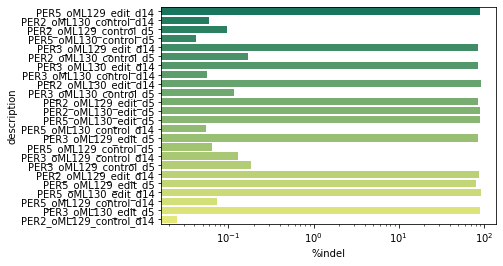

In [140]:
sns.barplot(data=df_small_index,y="description",x="%indel",palette="summer")
plt.xscale("log")
plt.savefig("UDITAS_WT_amplicon_indel_frequency.pdf",bbox_inches='tight')


In [137]:
df_small_index.to_csv("small_indel_frequency.csv",index=False)

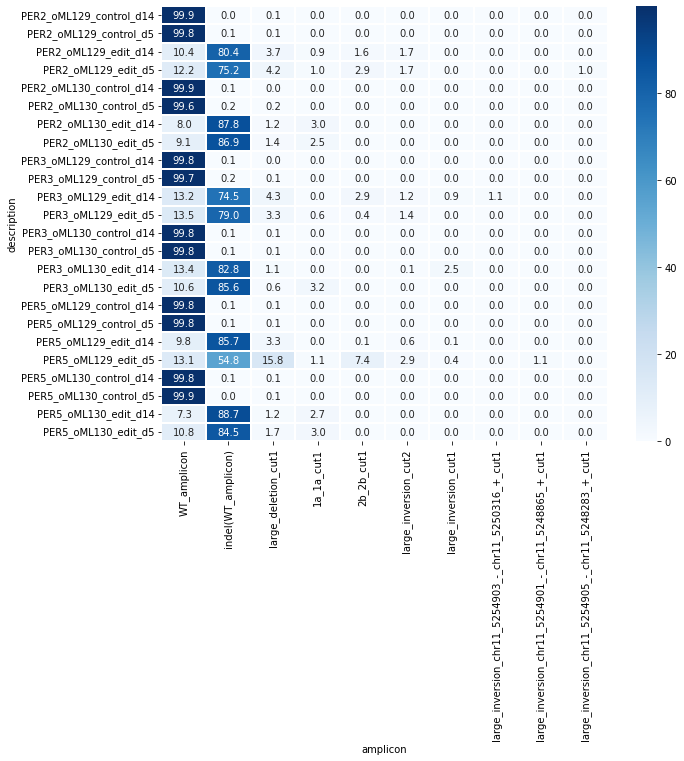

In [139]:
df5 = df.pivot(index="description",columns = ['amplicon'],values="frequency").fillna(0)
df6 = df5.copy()
df7=df6[df6.columns[df6.max()>=0.01]]*100
plt.figure(figsize=(10,8))
columns_order = df7.mean().sort_values(ascending=False).index.tolist()
sns.heatmap(df7[columns_order],annot=True,cmap="Blues",linewidth=0.1,fmt=".1f")
plt.savefig("UDITAS_amplicon_read_percent_heatmap.v2.pdf",bbox_inches='tight')


In [138]:
out="UMI_collapse_junction_read.merged.v2.csv"
df7[columns_order].to_csv(out)

In [76]:
for i,r in sample.iterrows():
    sample_name = r['description']
    chr_guide_1 = r['chr_guide_1']
    start_guide_1 = r['start_guide_1']
    end_guide_1 = r['end_guide_1']
    chr_guide_2 = r['chr_guide_2']
    start_guide_2 = r['start_guide_2']
    end_guide_2 = r['end_guide_2']
    columns = df7.columns.tolist()
    # circle=get_circos_obj() 
    if not sample_name in df7.index:
        continue
    for c in columns:
        if df7.at[sample_name,c]>=1:
            c_items = c.split("_")
            print (sample_name,c_items)

PER2_oML129_control_d5 ['WT', 'amplicon']
PER2_oML129_edit_d5 ['1a', '1a', 'cut1']
PER2_oML129_edit_d5 ['2b', '2b', 'cut1']
PER2_oML129_edit_d5 ['WT', 'amplicon']
PER2_oML129_edit_d5 ['indel(WT', 'amplicon)']
PER2_oML129_edit_d5 ['large', 'deletion', 'cut1']
PER2_oML129_edit_d5 ['large', 'inversion', 'chr11', '5254905', '-', 'chr11', '5248283', '+', 'cut1']
PER2_oML129_edit_d5 ['large', 'inversion', 'cut2']
PER3_oML129_control_d5 ['WT', 'amplicon']
PER3_oML129_edit_d5 ['WT', 'amplicon']
PER3_oML129_edit_d5 ['indel(WT', 'amplicon)']
PER3_oML129_edit_d5 ['large', 'deletion', 'cut1']
PER3_oML129_edit_d5 ['large', 'inversion', 'cut2']
PER5_oML129_control_d5 ['WT', 'amplicon']
PER5_oML129_edit_d5 ['1a', '1a', 'cut1']
PER5_oML129_edit_d5 ['2b', '2b', 'cut1']
PER5_oML129_edit_d5 ['WT', 'amplicon']
PER5_oML129_edit_d5 ['indel(WT', 'amplicon)']
PER5_oML129_edit_d5 ['large', 'deletion', 'cut1']
PER5_oML129_edit_d5 ['large', 'inversion', 'chr11', '5254901', '-', 'chr11', '5248865', '+', 'cut1']
P

In [117]:
def read_file(label):
    files = glob.glob("{0}/*/*{0}*amplicon_mapping.tsv".format(label))
    df = pd.concat([pd.read_csv(f,sep="\t") for f in files])
    df['amplicon_order'] = df.prefix.apply(rank_amplicon)

    
    df['position_end'] = df.position + np.abs(df.indel)
    df = df.reset_index()
    df['overlap'] = df.apply(lambda r:get_intersection(r.position,r.position_end,r.region_start,r.region_end),axis=1)
    df = df.sort_values(['AS',"amplicon_order",'overlap'],ascending=[False,True,False])
    return df
    df = df.drop_duplicates("read_name")
    df = df.drop_duplicates("UMI")
    df['category'] = df.apply(get_category,axis=1)
    df=pd.DataFrame(df.category.value_counts()).reset_index()
    df.columns = ['amplicon','#collapsed_read_count']
    df['frequency'] = df['#collapsed_read_count']/df['#collapsed_read_count'].sum()
    df['label'] = label
    return df
x="N715_N508"
x = read_file(x)
x

,index,AS,UMI,indel,position,prefix,read_end,read_name,read_start,region_end,region_start,amplicon_order,position_end,overlap
88,88,0,GCTGCGGATG,0,-1,wt_cut2,6134,M04990:204:000000000-KN8FY:1:1102:27394:16352,5834,5940,5909,0,-1,0
90,90,0,TTTCAGGATG,0,-1,wt_cut2,6134,M04990:204:000000000-KN8FY:1:1102:27096:18265,5834,5940,5909,0,-1,0
96,96,0,TGTATCCAGC,0,-1,wt_cut2,6134,M04990:204:000000000-KN8FY:1:1103:11311:8560,5834,5940,5909,0,-1,0
103,103,0,TTTCAGGATG,0,-1,wt_cut2,6134,M04990:204:000000000-KN8FY:1:1103:25113:18681,5834,5940,5909,0,-1,0
109,109,0,GCTGCGGATG,0,-1,wt_cut2,6134,M04990:204:000000000-KN8FY:1:1104:17123:4401,5834,5940,5909,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290574,266,-100,TTGTATACAC,0,-1,2b_2b_cut1,1026,M04990:204:000000000-KN8FY:1:2103:27329:7923,743,1016,985,2,-1,0
290581,273,-100,GTGCCTCGTT,0,-1,2b_2b_cut1,1026,M04990:204:000000000-KN8FY:1:1116:8386:10907,745,1016,985,2,-1,0
290654,346,-100,GTGCCTCGTT,0,-1,2b_2b_cut1,1255,M04990:204:000000000-KN8FY:1:1116:8386:10907,974,1016,985,2,-1,0
290664,356,-100,TTGTATACAC,0,-1,2b_2b_cut1,1257,M04990:204:000000000-KN8FY:1:2103:27329:7923,974,1016,985,2,-1,0


In [90]:
8437/(8437+4406)

0.6569337382231566

In [ ]:
    df = df.sort_values(['AS',"amplicon_order"],ascending=[False,True])
    df = df.drop_duplicates("read_name")
    df = df.drop_duplicates("UMI")

In [106]:
x['read_length'] = x.read_start-x.read_end
x.sort_values("read_length")

,index,AS,UMI,indel,position,prefix,read_end,read_name,read_start,region_end,region_start,amplicon_order,position_end,overlap,overlap2,read_length
134239,134239,-95,AGTCGAATTT,-30,5921,wt_cut2,6179,M04990:204:000000000-KN8FY:1:1109:17629:20762,5849,5940,5909,0,5951,19,31,-330
134246,134246,-95,AGTCGAATTT,-30,5921,wt_cut2,6179,M04990:204:000000000-KN8FY:1:1115:26573:6686,5849,5940,5909,0,5951,19,31,-330
134252,134252,-95,AGTCGAATTT,-30,5921,wt_cut2,6179,M04990:204:000000000-KN8FY:1:2104:21335:10290,5849,5940,5909,0,5951,19,31,-330
285966,134471,-96,GGACAGCGAA,-29,981,wt_cut1,1266,M04990:204:000000000-KN8FY:1:2102:23456:4018,936,1016,985,0,1010,25,31,-330
134449,134449,-95,AGTCGAATTT,-30,5921,wt_cut2,6179,M04990:204:000000000-KN8FY:1:2105:23245:16154,5850,5940,5909,0,5951,19,31,-329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133905,133905,-14,AATTTTTAAT,2,5924,wt_cut2,5944,M04990:204:000000000-KN8FY:1:1116:21284:18537,5848,5940,5909,0,5926,2,31,-96
133947,133947,-14,CTGCACGTAT,0,-1,wt_cut2,5942,M04990:204:000000000-KN8FY:1:2101:27057:18575,5848,5940,5909,0,-1,0,31,-94
285021,133526,-14,CTGCACGTAT,0,-1,wt_cut1,1018,M04990:204:000000000-KN8FY:1:2101:27057:18575,924,1016,985,0,-1,0,31,-94
285602,134107,-21,TGCAATTCTG,-3,997,wt_cut1,1017,M04990:204:000000000-KN8FY:1:1111:17215:6756,928,1016,985,0,1000,3,31,-89


In [114]:
x[(x.overlap==0)&(x.prefix.str.contains("wt"))&(x.position!=-1)]

,index,AS,UMI,indel,position,prefix,read_end,read_name,read_start,region_end,region_start,amplicon_order,position_end,overlap,overlap2,read_length
66082,66082,-8,AGCGACCACT,-1,6037,wt_cut2,6063,M04990:204:000000000-KN8FY:1:1105:22511:22844,5835,5940,5909,0,6038,0,31,-228
66217,66217,-8,GAATTTACTT,-1,6037,wt_cut2,6057,M04990:204:000000000-KN8FY:1:1106:9619:1993,5835,5940,5909,0,6038,0,31,-222
67791,67791,-8,TGTTTTCGCT,-1,6037,wt_cut2,6136,M04990:204:000000000-KN8FY:1:1106:24625:18146,5835,5940,5909,0,6038,0,31,-301
68632,68632,-8,GCGTACCNCN,-1,5846,wt_cut2,6101,M04990:204:000000000-KN8FY:1:1107:18783:6630,5835,5940,5909,0,5847,0,31,-266
74365,74365,-8,TTGAACGGGT,-1,5840,wt_cut2,5952,M04990:204:000000000-KN8FY:1:1109:21783:22368,5835,5940,5909,0,5841,0,31,-117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156891,5396,-100,TATTTTCTAG,1,1143,wt_cut1,1209,M04990:204:000000000-KN8FY:1:1104:22950:3853,911,1016,985,0,1144,0,31,-298
158369,6874,-100,CTACGTGGCT,1,1148,wt_cut1,1214,M04990:204:000000000-KN8FY:1:1104:23323:20388,911,1016,985,0,1149,0,31,-303
159672,8177,-100,GAATGTGGAG,4,1151,wt_cut1,1203,M04990:204:000000000-KN8FY:1:1105:11727:13819,911,1016,985,0,1155,0,31,-292
225984,74489,-100,TATGGGTATT,4,1106,wt_cut1,1206,M04990:204:000000000-KN8FY:1:1110:8097:8445,911,1016,985,0,1110,0,31,-295


In [119]:
x[x.read_name=="M04990:204:000000000-KN8FY:1:2118:28331:11637"]

,index,AS,UMI,indel,position,prefix,read_end,read_name,read_start,region_end,region_start,amplicon_order,position_end,overlap
135596,135596,-13,AATTGNGTCC,0,-1,wt_cut2,6168,M04990:204:000000000-KN8FY:1:2118:28331:11637,5868,5940,5909,0,-1,0
286518,135023,-52,AATTGNGTCC,0,-1,wt_cut1,1240,M04990:204:000000000-KN8FY:1:2118:28331:11637,944,1016,985,0,-1,0


In [62]:
x=pd.DataFrame(x.category.value_counts()).reset_index()
x.columns = ['amplicon','#collapsed_read_count']
x['frequency'] = x['#collapsed_read_count']/x['#collapsed_read_count'].sum()
x

,amplicon,#collapsed_read_count,frequency
0,WT_amplicon,7331,0.548440
1,indel(WT_amplicon),5512,0.412359
2,1a_1a_cut1,366,0.027381
3,large_deletion_cut1,154,0.011521
4,large_inversion_cut2,4,0.000299


In [41]:
df[(df.amplicon_order==0)&(df.overlap>0)].label.value_counts()

N706_N502    27288
N702_N506    16694
N704_N504    11912
N704_N508    10166
N702_N502    10016
N706_N506     6839
N715_N508     5512
N710_N504     4176
N712_N506     3386
N712_N502     2896
N710_N508     2767
N715_N504     2623
N701_N501       26
N703_N503       20
N705_N501       20
N705_N505       17
N703_N507        9
N714_N507        5
N707_N503        4
N711_N505        4
N707_N507        4
N711_N501        3
N714_N503        2
N701_N505        1
Name: label, dtype: int64

In [45]:
sample = pd.read_csv("sample_info.csv")
sample.index = sample['index_I1']+"_"+sample['index_I2']
tmp = sample.description.to_dict()
sample

,NGS_req-ID,name,Sample,description,Control sample (Y/N),Notes,Dilution,Cell name_type,I7_Index_ID,index_I1,...,sequence_guide_3,genome_guide_3,chr_guide_3,start_guide_3,end_guide_3,strand_guide_3,Donor (single strand; double strand),plamid_name,plasmid_sequence,genomic_background
N701_N501,VK2138,VK2138,VK2138,PER2_oML129_control_d5,Y,NaN,NaN,CD34,P7_N701_SBS12,N701,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N702_N502,VK2139,VK2139,VK2139,PER2_oML129_edit_d5,N,NaN,NaN,CD34,P7_N702_SBS12,N702,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N703_N503,VK2140,VK2140,VK2140,PER3_oML129_control_d5,Y,NaN,NaN,CD34,P7_N703_SBS12,N703,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N704_N504,VK2141,VK2141,VK2141,PER3_oML129_edit_d5,N,NaN,NaN,CD34,P7_N704_SBS12,N704,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N705_N505,VK2142,VK2142,VK2142,PER5_oML129_control_d5,Y,NaN,NaN,CD34,P7_N705_SBS12,N705,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N706_N506,VK2143,VK2143,VK2143,PER5_oML129_edit_d5,N,NaN,NaN,CD34,P7_N706_SBS12,N706,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N707_N507,VK2144,VK2144,VK2144,PER2_oML130_control_d5,Y,NaN,NaN,CD34,P7_N707_SBS12,N707,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N710_N508,VK2145,VK2145,VK2145,PER2_oML130_edit_d5,N,NaN,NaN,CD34,P7_N710_SBS12,N710,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N711_N501,VK2146,VK2146,VK2146,PER3_oML130_control_d5,Y,NaN,NaN,CD34,P7_N711_SBS12,N711,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N712_N502,VK2147,VK2147,VK2147,PER3_oML130_edit_d5,N,NaN,NaN,CD34,P7_N712_SBS12,N712,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df['description'] = df.label.map(tmp)

In [48]:
df

,index,AS,UMI,indel,position,prefix,read_end,read_name,read_start,region_end,region_start,amplicon_order,label,position_end,overlap,description
0,19114,0,TTGGGAAAAA,0,-1,wt_cut1,1106,M04990:204:000000000-KN8FY:1:1101:18725:2156,911,1016,985,0,N710_N508,-1,0,PER2_oML130_edit_d5
1,19154,0,GATCCCGACT,0,-1,wt_cut1,1083,M04990:204:000000000-KN8FY:1:1101:21410:4447,911,1016,985,0,N710_N508,-1,0,PER2_oML130_edit_d5
2,19175,0,GATACTACAA,0,-1,wt_cut1,1083,M04990:204:000000000-KN8FY:1:1101:10666:5182,911,1016,985,0,N710_N508,-1,0,PER2_oML130_edit_d5
3,19195,0,AATCATAATA,0,-1,wt_cut1,1104,M04990:204:000000000-KN8FY:1:1101:6605:5919,911,1016,985,0,N710_N508,-1,0,PER2_oML130_edit_d5
4,19208,0,TGATCTTGTC,0,-1,wt_cut1,1055,M04990:204:000000000-KN8FY:1:1101:11239:6415,911,1016,985,0,N710_N508,-1,0,PER2_oML130_edit_d5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557360,84055,-100,CANTTATACT,0,-1,wt_cut2,6074,M04990:204:000000000-KN8FY:1:1104:19195:22388,5774,5940,5909,0,N703_N507,-1,0,PER3_oML129_control_d14
557361,87554,-100,ATGTGNTNTT,0,-1,wt_cut2,6074,M04990:204:000000000-KN8FY:1:1105:2410:8948,5774,5940,5909,0,N703_N507,-1,0,PER3_oML129_control_d14
557362,100127,-100,TGTGCTTATN,0,-1,wt_cut2,6074,M04990:204:000000000-KN8FY:1:1106:18331:14136,5774,5940,5909,0,N703_N507,-1,0,PER3_oML129_control_d14
557363,107787,-100,GTTCTAAANC,0,-1,wt_cut2,6074,M04990:204:000000000-KN8FY:1:1105:5923:15572,5775,5940,5909,0,N703_N507,-1,0,PER3_oML129_control_d14


In [49]:
df.prefix.unique()

array(['wt_cut1', 'wt_cut2', '1a_1a_cut1', 'large_deletion_cut1',
       'large_inversion_cut2',
       'large_inversion_chr11_5254901_-_chr11_5287066_+_cut1',
       '2b_2b_cut1',
       'large_deletion_chr11_5254903_-_chr11_5250316_+_cut1',
       '2b_1b_chr11_5254898_-_chrX_129734602_-_cut1',
       '2b_1b_chr11_5254896_-_chr6_91982_-_cut1',
       'large_inversion_chr11_5254898_-_chr11_5249943_+_cut1',
       'large_deletion_chr11_5254898_-_chr11_5249943_+_cut1',
       'large_inversion_cut1',
       '1a_2a_chr11_5254896_-_chr6_170654479_+_cut1',
       '2a_1b_chr11_5254896_-_chr6_91982_-_cut1',
       'large_inversion_chr11_5254903_-_chr11_5250316_+_cut1',
       '2a_1b_chr11_5254898_-_chrX_129734602_-_cut1',
       '1a_2b_chr11_5254896_-_chr6_91982_-_cut1',
       '2a_1b_chr11_5254896_-_chr6_170654479_+_cut1',
       '2b_1b_chr11_5254896_-_chr6_170654479_+_cut1',
       '1a_2a_chr11_5254898_-_chrX_129734602_-_cut1',
       '1a_2b_chr11_5254896_-_chr6_170654479_+_cut1',
       '1a

In [50]:
def get_category(r):
    if "wt" in r.prefix:
        if r.overlap>0:
            return "indel(WT_amplicon)"
        return "WT_amplicon"
    return r.prefix
df['category'] = df.apply(get_category,axis=1)

In [53]:
df.groupby(['label','category']).size()

label      category            
N701_N501  1a_1a_cut1                  2
           WT_amplicon             52043
           indel(WT_amplicon)         26
           large_deletion_cut1        53
           large_inversion_cut2        2
                                   ...  
N715_N508  1a_1a_cut1                366
           WT_amplicon              7331
           indel(WT_amplicon)       5512
           large_deletion_cut1       154
           large_inversion_cut2        4
Length: 223, dtype: int64

In [ ]:
df5 = df.pivot(index="description",columns = ['amplicon'],values="frequency").fillna(0)
df5['WT (indels included)'] = df5[['wt_cut1','wt_cut2']].sum(axis=1)
df6 = df5.drop(['wt_cut1','wt_cut2'],axis=1)
df7=df6[df6.columns[df6.max()>=0.01]]*100
plt.figure(figsize=(10,8))
sns.heatmap(df7,annot=True,cmap="Blues",linewidth=0.1,fmt=".1f")
plt.savefig("UDITAS_amplicon_read_percent_heatmap.pdf",bbox_inches='tight')


In [44]:
df[df.label=="N715_N508"].prefix.value_counts()

wt_cut2                 11140
wt_cut1                  1703
1a_1a_cut1                366
large_deletion_cut1       154
large_inversion_cut2        4
Name: prefix, dtype: int64

In [42]:
df[['label','prefix']].value_counts()

label      prefix                                     
N706_N502  wt_cut2                                        38089
N705_N501  wt_cut2                                        30921
N702_N506  wt_cut2                                        29551
N701_N501  wt_cut2                                        29186
N704_N504  wt_cut2                                        26329
                                                          ...  
N707_N507  large_inversion_cut1                               1
N702_N506  1a_2b_chr11_5249973_-_chr8_34572431_-_cut1         1
N702_N502  large_inversion_cut1                               1
N712_N506  2b_1b_chr11_5254897_-_chr1_103926039_+_cut1        1
N706_N506  1a_2a_chr11_5249973_-_chr10_42208516_-_cut1        1
Length: 223, dtype: int64